## Perturbing Speed Aysmmetrically

Text(0, 0.5, 'Maximum Average Deviation (km)')

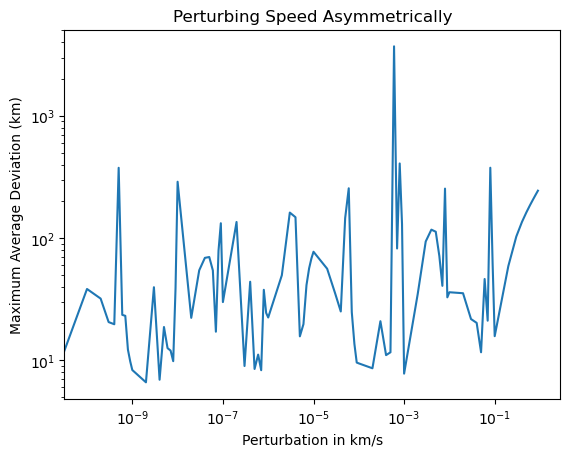

In [1]:

#Let's try to perturb the speed of one particle and see what outcome we get

#This code block plots a graph of maxmimum deviation against perturbation

"""
All particles evenly spaced out on the circumference of a circle of radius 1 centered at the origin, moving with speed 1 tangential to the circle clockwise

"""
import numpy as np

from scipy.constants import gravitational_constant as G

from scipy.integrate import solve_ivp as solve

from matplotlib import pyplot as plt

def to_be_solved(t, y , G , m_1 , m_2 , m_3 ):

    [v_x1 , v_y1 , v_x2, v_y2, v_x3, v_y3, x_1, y_1, x_2 , y_2 , x_3 , y_3] = y

    a_x1 =  1/m_1*(-(x_1-x_2)/((x_1 - x_2)**2 + (y_1-y_2)**2)**(3/2) -  (x_1 - x_3)/((x_1 - x_3)**2 + (y_1 - y_3)**2)**(3/2))
    # this line should have y_1 - y_3 in the second term
    a_y1 =  (-(y_1-y_2)/((x_1 - x_2)**2 + (y_1-y_2)**2)**(3/2)  - (y_1-y_3)/((x_1 - x_3)**2+(y_1 - y_3)**2)**(3/2))*(1/m_1)

    a_x2 =  (-(x_2-x_1)/((x_2 - x_1)**2 + (y_1-y_2)**2)**(3/2) -  (x_2 - x_3)/((x_2 - x_3)**2 + (y_2 - y_3)**2)**(3/2))*(1/m_2)

    a_y2 =  (-(y_2-y_1)/((x_2 - x_1)**2 + (y_1-y_2)**2)**(3/2) -  (y_2 - y_3)/((x_2 - x_3)**2 + (y_2 - y_3)**2)**(3/2))*(1/m_2)

    a_x3 =  (-(x_3 - x_2)/((x_3 - x_2)**2 + (y_3 - y_2)**2)**(3/2) - (x_3 - x_1)/((x_3 - x_1)**2 + (y_3 - y_1)**2)**(3/2))*(1/m_3)

    a_y3 =  (-(y_3 - y_2)/((x_3 - x_2)**2 + (y_3 - y_2)**2)**(3/2) - (y_3 - y_1)/((x_3 - x_1)**2 + (y_3 - y_1)**2)**(3/2))*(1/m_3)


    return [a_x1 , a_y1 , a_x2 , a_y2 , a_x3 , a_y3 , v_x1 , v_y1 , v_x2 , v_y2 , v_x3 , v_y3 ]


def deltas (x_1 , y_1 , xp_1 , yp_1 , x_2 , y_2 , xp_2 , yp_2 , x_3 , y_3 , xp_3 , yp_3 ,t):
    
    if len(x_1) > len(xp_1):
        
        max_x = x_1
        
        min_x = xp_1
        
        t_min = np.linspace (0,t, len(min_x))

        t_max = np.linspace (0,t, len(max_x))
        
        int_xp_1 , int_xp_2 , int_xp_3 , int_yp_1 , int_yp_2 , int_yp_3 = np.interp(t_max ,t_min , xp_1 ) , np.interp(t_max ,t_min , xp_2) , np.interp(t_max ,t_min , xp_3) , np.interp(t_max ,t_min , yp_1) , np.interp(t_max ,t_min , yp_2) ,np.interp(t_max ,t_min , yp_3) 
        
        m =  len(max_x) 

        z = [(1/3)*(((x_1[i]- int_xp_1[i])**2 + (y_1[i] - int_yp_1[i])**2)**(1/2) + ((x_2[i]- int_xp_2[i])**2 + (y_2[i] - int_yp_2[i])**2)**(1/2) + ((x_3[i]- int_xp_3[i])**2 + (y_3[i] - int_yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)
    
        return w
    
    elif len(x_1) < len(xp_1):
        
        max_x = xp_1
        
        min_x = x_1
        
        t_min   = np.linspace (0,t, len(min_x))

        t_max   = np.linspace (0,t, len(max_x))
        
        int_x_1 , int_x_2 , int_x_3 , int_y_1 , int_y_2 , int_y_3 = np.interp(t_max ,t_min , x_1) , np.interp(t_max ,t_min , x_2),np.interp(t_max ,t_min , x_3), np.interp(t_max ,t_min , y_1) , np.interp(t_max ,t_min , y_2) , np.interp(t_max ,t_min , y_3)
        
        m = len(max_x )

        z = [(1/3)*(((int_x_1[i]- xp_1[i])**2 + (int_y_1[i] - yp_1[i])**2)**(1/2) + ((int_x_2[i]- xp_2[i])**2 + (int_y_2[i] - yp_2[i])**2)**(1/2) + ((int_x_3[i]- xp_3[i])**2 + (int_y_3[i] - yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)
        
        return w
        
    else:
        
        m =  len(x_1) 
            
        z = [(1/3)*(((x_1[i]- xp_1[i])**2 + (y_1[i] - yp_1[i])**2)**(1/2) + ((x_2[i]- xp_2[i])**2 + (y_2[i] - yp_2[i])**2)**(1/2) + ((x_3[i]- xp_3[i])**2 + (y_3[i] - yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)

        return w
    

soln = solve (to_be_solved , (0,348) , [1, 0, (-1/2), (-np.sqrt(3)/2), (-1/2) ,np.sqrt(3)/2 , 0 , 1 , np.sqrt(3)/2 , (-1/2) ,(-np.sqrt(3)/2) ,(-1/2)] , args = (1,1,1,1) , max_step = 0.01, )

x_1s , y_1s , x_2s , y_2s , x_3s , y_3s = soln.y[6] , soln.y[7] , soln.y[8] , soln.y[9] , soln.y[10] , soln.y[11]


def pert_speed(u):

    pert_soln = solve (to_be_solved , (0,348) , [1+u, 0, (-1/2), (-np.sqrt(3)/2), (-1/2) , (np.sqrt(3)/2), 0 , 1 , np.sqrt(3)/2 , (-1/2) ,(-np.sqrt(3)/2) ,(-1/2)] , args = (1,1,1,1) , max_step = 0.01, )

    xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s = pert_soln.y[6] , pert_soln.y[7] , pert_soln.y[8] , pert_soln.y[9] , pert_soln.y[10] , pert_soln.y[11]

    return xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s

def generate_perturbations(p):
    
    perturbations = [0]
    
    for j in range(1,p+1):
        
        for i in range(1,10):
            
            perturbations.append(10**(-(p+1-j))*i)
    
    
    return (perturbations)


max_distance = []

perts = generate_perturbations(10)

for i in range (0,len(perts),1):
    
    xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s = pert_speed(perts[i])
    
    delta = deltas(x_1s , y_1s , xp_1s , yp_1s , x_2s , y_2s , xp_2s , yp_2s , x_3s , y_3s , xp_3s , yp_3s , 348)
    
    max_distance.append(delta)
    
plt.xscale('log')

plt.yscale('log')

plt.plot(perts , max_distance)

plt.title("Perturbing Speed Asymmetrically")

plt.xlabel("Perturbation in km/s")

plt.ylabel("Maximum Average Deviation (km)") 

## Perturbing Angle Asymmetrically

Text(0, 0.5, 'Maximum Average Deviation (pcs)')

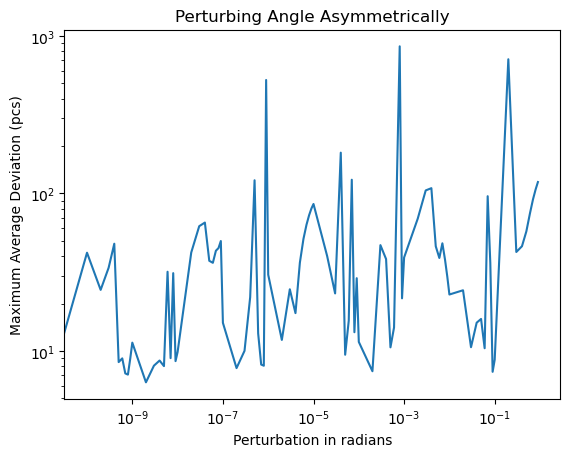

In [8]:
#Here we perturb the angle the velocity vector of a particle makes with the tangent to the circle at that point for one particle

#This graph plots maximum average deviation against perurbation

"""

All particles evenly spaced out on the circumference of a circle of radius 1 centered at the origin, moving with speed 1 tangential to the circle clockwise

"""
import numpy as np

from scipy.constants import gravitational_constant as G

from scipy.integrate import solve_ivp as solve

from matplotlib import pyplot as plt

def to_be_solved(t, y , G , m_1 , m_2 , m_3 ):

    [v_x1 , v_y1 , v_x2, v_y2, v_x3, v_y3, x_1, y_1, x_2 , y_2 , x_3 , y_3] = y

    a_x1 =  1/m_1*(-(x_1-x_2)/((x_1 - x_2)**2 + (y_1-y_2)**2)**(3/2) -  (x_1 - x_3)/((x_1 - x_3)**2 + (y_1 - y_3)**2)**(3/2))
    # this line should have y_1 - y_3 in the second term
    a_y1 =  (-(y_1-y_2)/((x_1 - x_2)**2 + (y_1-y_2)**2)**(3/2)  - (y_1-y_3)/((x_1 - x_3)**2+(y_1 - y_3)**2)**(3/2))*(1/m_1)

    a_x2 =  (-(x_2-x_1)/((x_2 - x_1)**2 + (y_1-y_2)**2)**(3/2) -  (x_2 - x_3)/((x_2 - x_3)**2 + (y_2 - y_3)**2)**(3/2))*(1/m_2)

    a_y2 =  (-(y_2-y_1)/((x_2 - x_1)**2 + (y_1-y_2)**2)**(3/2) -  (y_2 - y_3)/((x_2 - x_3)**2 + (y_2 - y_3)**2)**(3/2))*(1/m_2)

    a_x3 =  (-(x_3 - x_2)/((x_3 - x_2)**2 + (y_3 - y_2)**2)**(3/2) - (x_3 - x_1)/((x_3 - x_1)**2 + (y_3 - y_1)**2)**(3/2))*(1/m_3)

    a_y3 =  (-(y_3 - y_2)/((x_3 - x_2)**2 + (y_3 - y_2)**2)**(3/2) - (y_3 - y_1)/((x_3 - x_1)**2 + (y_3 - y_1)**2)**(3/2))*(1/m_3)


    return [a_x1 , a_y1 , a_x2 , a_y2 , a_x3 , a_y3 , v_x1 , v_y1 , v_x2 , v_y2 , v_x3 , v_y3 ]

def deltas (x_1 , y_1 , xp_1 , yp_1 , x_2 , y_2 , xp_2 , yp_2 , x_3 , y_3 , xp_3 , yp_3 ,t):
    
    if len(x_1) > len(xp_1):
        
        max_x = x_1
        
        min_x = xp_1
        
        t_min = np.linspace (0,t, len(min_x))

        t_max = np.linspace (0,t, len(max_x))
        
        int_xp_1 , int_xp_2 , int_xp_3 , int_yp_1 , int_yp_2 , int_yp_3 = np.interp(t_max ,t_min , xp_1 ) , np.interp(t_max ,t_min , xp_2) , np.interp(t_max ,t_min , xp_3) , np.interp(t_max ,t_min , yp_1) , np.interp(t_max ,t_min , yp_2) ,np.interp(t_max ,t_min , yp_3) 
        
        m =  len(max_x) 

        z = [(1/3)*(((x_1[i]- int_xp_1[i])**2 + (y_1[i] - int_yp_1[i])**2)**(1/2) + ((x_2[i]- int_xp_2[i])**2 + (y_2[i] - int_yp_2[i])**2)**(1/2) + ((x_3[i]- int_xp_3[i])**2 + (y_3[i] - int_yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)
    
        return w
    
    elif len(x_1) < len(xp_1):
        
        max_x = xp_1
        
        min_x = x_1
        
        t_min   = np.linspace (0,t, len(min_x))

        t_max   = np.linspace (0,t, len(max_x))
        
        int_x_1 , int_x_2 , int_x_3 , int_y_1 , int_y_2 , int_y_3 = np.interp(t_max ,t_min , x_1) , np.interp(t_max ,t_min , x_2),np.interp(t_max ,t_min , x_3), np.interp(t_max ,t_min , y_1) , np.interp(t_max ,t_min , y_2) , np.interp(t_max ,t_min , y_3)
        
        m = len(max_x )

        z = [(1/3)*(((int_x_1[i]- xp_1[i])**2 + (int_y_1[i] - yp_1[i])**2)**(1/2) + ((int_x_2[i]- xp_2[i])**2 + (int_y_2[i] - yp_2[i])**2)**(1/2) + ((int_x_3[i]- xp_3[i])**2 + (int_y_3[i] - yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)
        
        return w
        
    else:
        
        m =  len(x_1) 
            
        z = [(1/3)*(((x_1[i]- xp_1[i])**2 + (y_1[i] - yp_1[i])**2)**(1/2) + ((x_2[i]- xp_2[i])**2 + (y_2[i] - yp_2[i])**2)**(1/2) + ((x_3[i]- xp_3[i])**2 + (y_3[i] - yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)

        return w

soln = solve (to_be_solved , (0,348) , [1, 0, (-1/2), (-np.sqrt(3)/2), (-1/2) ,np.sqrt(3)/2 , 0 , 1 , np.sqrt(3)/2 , (-1/2) ,(-np.sqrt(3)/2) ,(-1/2)] , args = (1,1,1,1) , max_step = 0.01, )

x_1s , y_1s , x_2s , y_2s , x_3s , y_3s = soln.y[6] , soln.y[7] , soln.y[8] , soln.y[9] , soln.y[10] , soln.y[11]

def pert_angle(u):

    pert_soln = solve (to_be_solved , (0,348) ,[np.cos(u), np.sin(u), (-1/2), (-np.sqrt(3)/2), (-1/2) ,np.sqrt(3)/2, 0 , 1 , np.sqrt(3)/2 ,(-1/2) ,(-np.sqrt(3)/2) ,(-1/2)]  , args = (1,1,1,1) ,max_step = 0.01,)

    xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s = pert_soln.y[6] , pert_soln.y[7] , pert_soln.y[8] , pert_soln.y[9] , pert_soln.y[10] , pert_soln.y[11]

    return xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s

max_distance = []

def generate_perturbations(p):
    
    perturbations = [0]
    
    for j in range(1,p+1):
        
        for i in range(1,10):
            
            perturbations.append(10**(-(p+1-j))*i)
    
    return perturbations


pert = generate_perturbations(10)

for i in range (0,len(pert),1):
    
#     xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s = pert_angle(10**(-3)*i)
    
    xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s = pert_angle(pert[i])

    delta = deltas(x_1s , y_1s , xp_1s , yp_1s , x_2s , y_2s , xp_2s , yp_2s , x_3s , y_3s , xp_3s , yp_3s , 348)
    
    max_distance.append(delta)

plt.xscale('log')

plt.yscale('log')

plt.plot( pert , max_distance )

plt.title("Perturbing Angle Asymmetrically")

plt.xlabel("Perturbation in radians")

plt.ylabel("Maximum Average Deviation (pcs)")

## Perturbing Mass Asymmetrically

Text(0, 0.5, 'Maximum Average Deviation (pcs)')

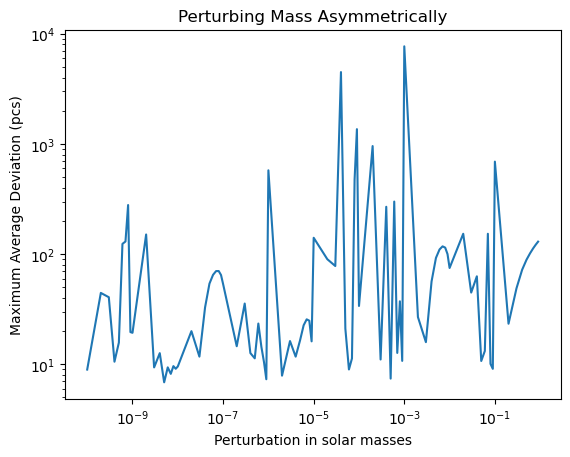

In [1]:
#Here we perturb mass and plot a graph of maximum deviation against perturbation pf mass

import numpy as np

from scipy.constants import gravitational_constant as G

from scipy.integrate import solve_ivp as solve

from matplotlib import pyplot as plt

def to_be_solved(t, y , G , m_1 , m_2 , m_3 ):

    [v_x1 , v_y1 , v_x2, v_y2, v_x3, v_y3, x_1, y_1, x_2 , y_2 , x_3 , y_3] = y

    a_x1 =  1/m_1*(-(x_1-x_2)/((x_1 - x_2)**2 + (y_1-y_2)**2)**(3/2) -  (x_1 - x_3)/((x_1 - x_3)**2 + (y_1 - y_3)**2)**(3/2))
    # this line should have y_1 - y_3 in the second term
    a_y1 =  (-(y_1-y_2)/((x_1 - x_2)**2 + (y_1-y_2)**2)**(3/2)  - (y_1-y_3)/((x_1 - x_3)**2+(y_1 - y_3)**2)**(3/2))*(1/m_1)

    a_x2 =  (-(x_2-x_1)/((x_2 - x_1)**2 + (y_1-y_2)**2)**(3/2) -  (x_2 - x_3)/((x_2 - x_3)**2 + (y_2 - y_3)**2)**(3/2))*(1/m_2)

    a_y2 =  (-(y_2-y_1)/((x_2 - x_1)**2 + (y_1-y_2)**2)**(3/2) -  (y_2 - y_3)/((x_2 - x_3)**2 + (y_2 - y_3)**2)**(3/2))*(1/m_2)

    a_x3 =  (-(x_3 - x_2)/((x_3 - x_2)**2 + (y_3 - y_2)**2)**(3/2) - (x_3 - x_1)/((x_3 - x_1)**2 + (y_3 - y_1)**2)**(3/2))*(1/m_3)

    a_y3 =  (-(y_3 - y_2)/((x_3 - x_2)**2 + (y_3 - y_2)**2)**(3/2) - (y_3 - y_1)/((x_3 - x_1)**2 + (y_3 - y_1)**2)**(3/2))*(1/m_3)


    return [a_x1 , a_y1 , a_x2 , a_y2 , a_x3 , a_y3 , v_x1 , v_y1 , v_x2 , v_y2 , v_x3 , v_y3 ]


def deltas (x_1 , y_1 , xp_1 , yp_1 , x_2 , y_2 , xp_2 , yp_2 , x_3 , y_3 , xp_3 , yp_3 ,t):
    
    if len(x_1) > len(xp_1):
        
        max_x = x_1
        
        min_x = xp_1
        
        t_min = np.linspace (0,t, len(min_x))

        t_max = np.linspace (0,t, len(max_x))
        
        int_xp_1 , int_xp_2 , int_xp_3 , int_yp_1 , int_yp_2 , int_yp_3 = np.interp(t_max ,t_min , xp_1 ) , np.interp(t_max ,t_min , xp_2) , np.interp(t_max ,t_min , xp_3) , np.interp(t_max ,t_min , yp_1) , np.interp(t_max ,t_min , yp_2) ,np.interp(t_max ,t_min , yp_3) 
        
        m =  len(max_x) 

        z = [(1/3)*(((x_1[i]- int_xp_1[i])**2 + (y_1[i] - int_yp_1[i])**2)**(1/2) + ((x_2[i]- int_xp_2[i])**2 + (y_2[i] - int_yp_2[i])**2)**(1/2) + ((x_3[i]- int_xp_3[i])**2 + (y_3[i] - int_yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)
    
        return w
    
    elif len(x_1) < len(xp_1):
        
        max_x = xp_1
        
        min_x = x_1
        
        t_min   = np.linspace (0,t, len(min_x))

        t_max   = np.linspace (0,t, len(max_x))
        
        int_x_1 , int_x_2 , int_x_3 , int_y_1 , int_y_2 , int_y_3 = np.interp(t_max ,t_min , x_1) , np.interp(t_max ,t_min , x_2),np.interp(t_max ,t_min , x_3), np.interp(t_max ,t_min , y_1) , np.interp(t_max ,t_min , y_2) , np.interp(t_max ,t_min , y_3)
        
        m = len(max_x )

        z = [(1/3)*(((int_x_1[i]- xp_1[i])**2 + (int_y_1[i] - yp_1[i])**2)**(1/2) + ((int_x_2[i]- xp_2[i])**2 + (int_y_2[i] - yp_2[i])**2)**(1/2) + ((int_x_3[i]- xp_3[i])**2 + (int_y_3[i] - yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)
        
        return w
        
    else:
        
        m =  len(x_1) 
            
        z = [(1/3)*(((x_1[i]- xp_1[i])**2 + (y_1[i] - yp_1[i])**2)**(1/2) + ((x_2[i]- xp_2[i])**2 + (y_2[i] - yp_2[i])**2)**(1/2) + ((x_3[i]- xp_3[i])**2 + (y_3[i] - yp_3[i])**2)**(1/2)) for i in range (0,m)]

        w = max(z)

        return w
    

soln = solve (to_be_solved , (0,348) , [1, 0, (-1/2), (-np.sqrt(3)/2), (-1/2) ,np.sqrt(3)/2 , 0 , 1 , np.sqrt(3)/2 , (-1/2) ,(-np.sqrt(3)/2) ,(-1/2)] , args = (1,1,1,1) , max_step = 0.01, )

x_1s , y_1s , x_2s , y_2s , x_3s , y_3s = soln.y[6] , soln.y[7] , soln.y[8] , soln.y[9] , soln.y[10] , soln.y[11]


def pert_mass(u):

    pert_soln = solve (to_be_solved , (0,348) , [1, 0, (-1/2), (-np.sqrt(3)/2), (-1/2) , (np.sqrt(3)/2), 0 , 1 , np.sqrt(3)/2 , (-1/2) ,(-np.sqrt(3)/2) ,(-1/2)] , args = (1,1+u,1,1) , max_step = 0.01, )

    xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s = pert_soln.y[6] , pert_soln.y[7] , pert_soln.y[8] , pert_soln.y[9] , pert_soln.y[10] , pert_soln.y[11]

    return xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s


def generate_perturbations(p):
    
    perturbations = []
    
#     for j in range(1,p+1):

    for j in range(1,p+1):

        for i in range(1,10):
            
            perturbations.append(10**(-(p+1-j))*i)
    
    return (perturbations)

max_distance = []

perts = generate_perturbations(10)

for i in range (0,len(perts),1):
    
    xp_1s , yp_1s , xp_2s , yp_2s , xp_3s , yp_3s = pert_mass(perts[i])

    delta = deltas(x_1s , y_1s , xp_1s , yp_1s , x_2s , y_2s , xp_2s , yp_2s , x_3s , y_3s , xp_3s , yp_3s , 348)
    
    max_distance.append(delta)

plt.xscale('log')

plt.yscale('log')

plt.plot(perts , max_distance)

plt.title("Perturbing Mass Asymmetrically")

plt.xlabel("Perturbation in solar masses")

plt.ylabel("Maximum Average Deviation (pcs)")


